In [1]:
import math
import os
import csv
import json
import requests
import random
import matplotlib.pylab as plt
import numpy as np
import cv2
import base64
import pickle
import requests

from urllib.request import urlretrieve
from pprint import pprint

from os import path as osp
from PIL import Image, ImageDraw
from urllib.request import urlretrieve
from k12libs.utils.nb_easy import k12ai_get_top_dir, RACEURL
from k12libs.utils.nb_easy import K12AI_DATASETS_ROOT
from k12libs.utils.nb_easy import k12ai_set_notebook

In [2]:
cv2.__version__

'4.4.0'

In [3]:
k12ai_set_notebook(cellw=90)

In [4]:
def im_show(img, gray=False, bgr=False):
    plt.figure(figsize=(8,8))
    plt.axis('off')
    if bgr:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGBA)
        
    if gray:
        plt.imshow(img, cmap=plt.cm.gray)
    else:
        plt.imshow(img)

## 开发调试

### Features

#### show 9 images

In [5]:
dataset_root = osp.join('/data/datasets/cv/dobble')
images_root = osp.join(dataset_root, 'icons')
!ls $images_root

0.png	16.png	23.png	30.png	38.png	45.png	52.png	6.png	67.png	8.png
1.png	17.png	24.png	31.png	39.png	46.png	53.png	60.png	68.png	9.png
10.png	18.png	25.png	32.png	4.png	47.png	54.png	61.png	69.png
11.png	19.png	26.png	33.png	40.png	48.png	55.png	62.png	7.png
12.png	2.png	27.png	34.png	41.png	49.png	56.png	63.png	70.png
13.png	20.png	28.png	35.png	42.png	5.png	57.png	64.png	71.png
14.png	21.png	29.png	36.png	43.png	50.png	58.png	65.png	72.png
15.png	22.png	3.png	37.png	44.png	51.png	59.png	66.png	73.png


In [6]:
image9_files = os.listdir(images_root)[:9]
images9 = [Image.open(osp.join(images_root, fname)) for fname in image9_files]

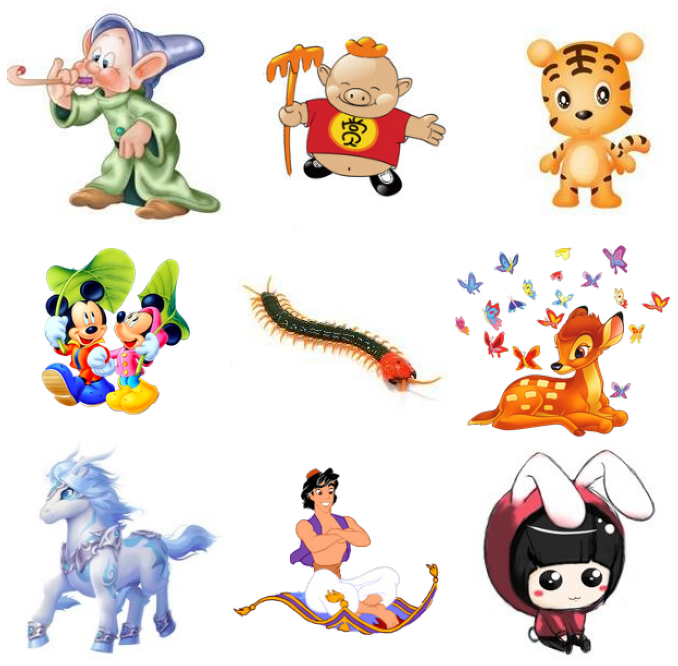

In [7]:
random.shuffle(images9)
nrow, ncol = 3, 3
fig = plt.figure(figsize=(4*nrow, 4*ncol))
for i in range(nrow*ncol):
    ax = fig.add_subplot(nrow, ncol, i+1)
    plt.axis('off')
    plt.imshow(images9[i])
plt.subplots_adjust(wspace =0, hspace =0)

#### Generate 73 cards

In [8]:
cards_seqs = [
    [0, 1, 2, 3, 4, 5, 6, 7, 8],
    [0, 9, 10, 11, 12, 13, 14, 15, 16],
    [0, 17, 18, 19, 20, 21, 22, 23, 24],
    [0, 25, 26, 27, 28, 29, 30, 31, 32],
    [0, 33, 34, 35, 36, 37, 38, 39, 40],
    [0, 41, 42, 43, 44, 45, 46, 47, 48],
    [0, 49, 50, 51, 52, 53, 54, 55, 56],
    [0, 57, 58, 59, 60, 61, 62, 63, 64],
    [0, 65, 66, 67, 68, 69, 70, 71, 72],
    [1, 9, 17, 25, 33, 41, 49, 57, 65],
    [1, 10, 18, 26, 34, 42, 50, 58, 66],
    [1, 11, 19, 27, 35, 43, 51, 59, 67],
    [1, 12, 20, 28, 36, 44, 52, 60, 68],
    [1, 13, 21, 29, 37, 45, 53, 61, 69],
    [1, 14, 22, 30, 38, 46, 54, 62, 70],
    [1, 15, 23, 31, 39, 47, 55, 63, 71],
    [1, 16, 24, 32, 40, 48, 56, 64, 72],
    [2, 9, 18, 27, 36, 45, 54, 63, 72],
    [2, 10, 17, 28, 35, 46, 53, 64, 71],
    [2, 11, 20, 25, 34, 47, 56, 61, 70],
    [2, 12, 19, 26, 33, 48, 55, 62, 69],
    [2, 13, 22, 31, 40, 41, 50, 59, 68],
    [2, 14, 21, 32, 39, 42, 49, 60, 67],
    [2, 15, 24, 29, 38, 43, 52, 57, 66],
    [2, 16, 23, 30, 37, 44, 51, 58, 65],
    [3, 9, 19, 29, 39, 46, 56, 58, 68],
    [3, 10, 20, 30, 40, 45, 55, 57, 67],
    [3, 11, 17, 31, 37, 48, 54, 60, 66],
    [3, 12, 18, 32, 38, 47, 53, 59, 65],
    [3, 13, 23, 25, 35, 42, 52, 62, 72],
    [3, 14, 24, 26, 36, 41, 51, 61, 71],
    [3, 15, 21, 27, 33, 44, 50, 64, 70],
    [3, 16, 22, 28, 34, 43, 49, 63, 69],
    [4, 9, 20, 31, 38, 42, 51, 64, 69],
    [4, 10, 19, 32, 37, 41, 52, 63, 70],
    [4, 11, 18, 29, 40, 44, 49, 62, 71],
    [4, 12, 17, 30, 39, 43, 50, 61, 72],
    [4, 13, 24, 27, 34, 46, 55, 60, 65],
    [4, 14, 23, 28, 33, 45, 56, 59, 66],
    [4, 15, 22, 25, 36, 48, 53, 58, 67],
    [4, 16, 21, 26, 35, 47, 54, 57, 68],
    [5, 9, 21, 30, 34, 48, 52, 59, 71],
    [5, 10, 22, 29, 33, 47, 51, 60, 72],
    [5, 11, 23, 32, 36, 46, 50, 57, 69],
    [5, 12, 24, 31, 35, 45, 49, 58, 70],
    [5, 13, 17, 26, 38, 44, 56, 63, 67],
    [5, 14, 18, 25, 37, 43, 55, 64, 68],
    [5, 15, 19, 28, 40, 42, 54, 61, 65],
    [5, 16, 20, 27, 39, 41, 53, 62, 66],
    [6, 9, 22, 32, 35, 44, 55, 61, 66],
    [6, 10, 21, 31, 36, 43, 56, 62, 65],
    [6, 11, 24, 30, 33, 42, 53, 63, 68],
    [6, 12, 23, 29, 34, 41, 54, 64, 67],
    [6, 13, 18, 28, 39, 48, 51, 57, 70],
    [6, 14, 17, 27, 40, 47, 52, 58, 69],
    [6, 15, 20, 26, 37, 46, 49, 59, 72],
    [6, 16, 19, 25, 38, 45, 50, 60, 71],
    [7, 9, 23, 26, 40, 43, 53, 60, 70],
    [7, 10, 24, 25, 39, 44, 54, 59, 69],
    [7, 11, 21, 28, 38, 41, 55, 58, 72],
    [7, 12, 22, 27, 37, 42, 56, 57, 71],
    [7, 13, 19, 30, 36, 47, 49, 64, 66],
    [7, 14, 20, 29, 35, 48, 50, 63, 65],
    [7, 15, 17, 32, 34, 45, 51, 62, 68],
    [7, 16, 18, 31, 33, 46, 52, 61, 67],
    [8, 9, 24, 28, 37, 47, 50, 62, 67],
    [8, 10, 23, 27, 38, 48, 49, 61, 68],
    [8, 11, 22, 26, 39, 45, 52, 64, 65],
    [8, 12, 21, 25, 40, 46, 51, 63, 66],
    [8, 13, 20, 32, 33, 43, 54, 58, 71],
    [8, 14, 19, 31, 34, 44, 53, 57, 72],
    [8, 15, 18, 30, 35, 41, 56, 60, 69],
    [8, 16, 17, 29, 36, 42, 55, 59, 70]
]

In [9]:
images73_files = os.listdir(images_root)
images73 = [osp.join(images_root, fname) for fname in images73_files[:73]]
random.shuffle(images73)
os.makedirs(f'{dataset_root}/imgs', exist_ok=True)

计算两个圆环之间最大的正方形的边长

$$ 
L = 2x = 2 * \dfrac{-2r + \sqrt{5R^2 - r^2}}{5}
$$

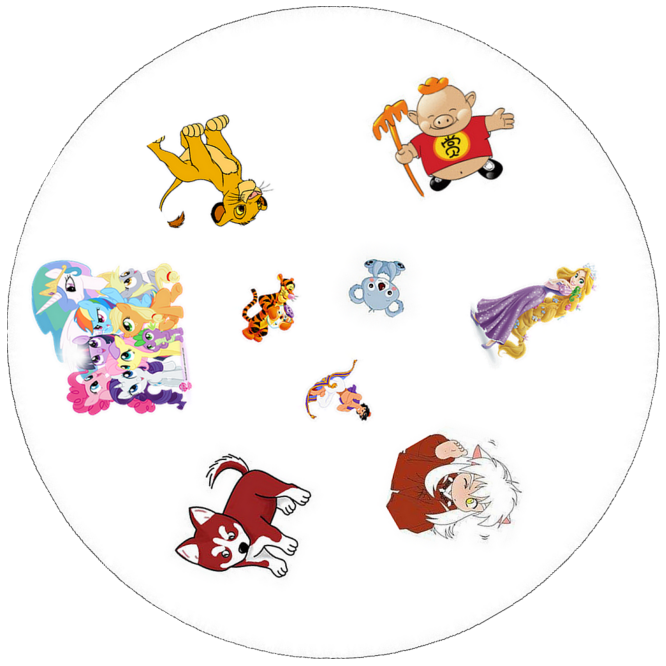

In [10]:
def generate_card(size, ratio_1, ratio_2, images, outpath, force=False, debug=False):
    if not force and osp.exists(outpath):
        return
    imgs = images.copy()
    
    R0 = round(size / 2)      # 最外环半径
    R1 = int(R0 * ratio_1)    # 中间环半径
    R2 = round(R1 * ratio_2)  # 中心环半径
    
    card = Image.new('RGBA', (2*R0, 2*R0))
    draw = ImageDraw.Draw(card)
    draw.ellipse((0, 0, card.width-1, card.height-1),
                 fill='#FFFFFF', outline='#000000')
    
    # 圆环
    if debug:
        draw.ellipse((0, 0, 2*R0, 2*R0), fill=None, outline='#FF0000')
        draw.text((30, 30), f'R0:{R0}', (255, 0, 0), width=4)

        draw.ellipse((R0-R1, R0-R1, R0+R1, R0+R1), fill=None, outline='#00FF00')
        draw.text((R0-R1+30, R0-R1+30), f'R1:{R1}', (0, 255, 0), width=4)

        draw.ellipse((R0-R2, R0-R2, R0+R2, R0+R2), fill=None, outline='#0000FF')
        draw.text((R0-R2+10, R0-R2+10), f'R2:{R2}', (0, 0, 255), width=4)
    
    # 环内正方形的中心
    if debug:
        r1_c = R2 + (R1 - R2) / 2
        r2_c = R1 + (R0 - R1) / 2
        draw.ellipse((R0-r1_c, R0-r1_c, R0+r1_c, R0+r1_c), fill=None, outline='#000FF0')
        draw.text((R0-r1_c+10, R0-r1_c+10), f'r1_c:{r1_c}', (0, 0, 255), width=4)

        draw.ellipse((R0-r2_c, R0-r2_c, R0+r2_c, R0+r2_c), fill=None, outline='#00F0F0')
        draw.text((R0-r2_c+50, R0-r2_c+50), f'r2_c:{r2_c}', (0, 0, 255), width=4)
    
    # 正方形的边长
    box_edge1 = 2 * round((-2*R2 + math.sqrt(5*R1*R1 - R2*R2)) / 5) # 内部正方形
    box_edge2 = 2 * round((-2*R1 + math.sqrt(5*R0*R0 - R1*R1)) / 5) # 外部正方形
    
    # 计算左上顶点
    box_xy1 = R0 + R2, R0 - round(box_edge1/2) 
    box_xy2 = R0 + R1, R0 - round(box_edge2/2) 
    
    def _paste_icon(card, box_xy, edge, num):
        angle = int(360 / num)
        for idx in range(num):
            scale = random.uniform(0.6, 0.98)
            size = round(scale*edge), round(scale*edge)
            img = Image.open(imgs.pop()).convert("RGBA")  
            img = img.resize(size, Image.ANTIALIAS).rotate(random.randrange(0, 360), resample=Image.BICUBIC)
            card.paste(img, box=box_xy, mask=img)
            card = card.rotate(angle, resample=Image.BICUBIC) 
        return card
    
    # 内圈3个ICON
    card = _paste_icon(card, box_xy1, box_edge1, 3)
        
    card = card.rotate(random.randint(10, 40), resample=Image.BICUBIC) 
    
    # 外圈6个ICON
    card = _paste_icon(card, box_xy2, box_edge2, 6)
    
    # 保存
    card.save(outpath, dpi=(600, 600), format='PNG', subsampling=0, quality=100)
    return card    
    # 圆环
    if debug:
        draw.ellipse((0, 0, 2*R0, 2*R0), fill=None, outline='#FF0000')
        draw.text((30, 30), f'R0:{R0}', (255, 0, 0), width=4)

        draw.ellipse((R0-R1, R0-R1, R0+R1, R0+R1), fill=None, outline='#00FF00')
        draw.text((R0-R1+30, R0-R1+30), f'R1:{R1}', (0, 255, 0), width=4)

        draw.ellipse((R0-R2, R0-R2, R0+R2, R0+R2), fill=None, outline='#0000FF')
        draw.text((R0-R2+10, R0-R2+10), f'R2:{R2}', (0, 0, 255), width=4)
    
    # 环内正方形的中心
    if debug:
        r1_c = R2 + (R1 - R2) / 2
        r2_c = R1 + (R0 - R1) / 2
        draw.ellipse((R0-r1_c, R0-r1_c, R0+r1_c, R0+r1_c), fill=None, outline='#000FF0')
        draw.text((R0-r1_c+10, R0-r1_c+10), f'r1_c:{r1_c}', (0, 0, 255), width=4)

        draw.ellipse((R0-r2_c, R0-r2_c, R0+r2_c, R0+r2_c), fill=None, outline='#00F0F0')
        draw.text((R0-r2_c+50, R0-r2_c+50), f'r2_c:{r2_c}', (0, 0, 255), width=4)
        
outfiles = []
for i, seq in enumerate(cards_seqs):
    images9 = [images73[j] for j in seq]
    outfiles.append(f'{dataset_root}/imgs/{i}.png')
    generate_card(1024, 0.42, 0.2, images9, outfiles[-1], force=True)
    
plt.figure(figsize=(12, 12))
plt.axis('off')
img_sample = cv2.imread(outfiles[0], cv2.IMREAD_UNCHANGED)
img_sample = cv2.cvtColor(img_sample, cv2.COLOR_BGR2RGBA)
plt.imshow(img_sample);

In [11]:
def generate_card_ex(size, ratio_1, ratio_2, images, outpath, resize_range=None, rotate_range=None, force=False, debug=False):
    if not force and osp.exists(outpath):
        return
    imgs = images.copy()
    
    R0 = round(size / 2)      # 最外环半径
    R1 = int(R0 * ratio_1)    # 中间环半径
    R2 = round(R1 * ratio_2)  # 中心环半径
    
    card = Image.new('RGBA', (2*R0, 2*R0))
    draw = ImageDraw.Draw(card)
    draw.ellipse((0, 0, card.width-1, card.height-1),
                 fill='#FFFFFF', outline='#000000')

    # 正方形的边长
    box_edge1 = 2 * round((-2*R2 + math.sqrt(5*R1*R1 - R2*R2)) / 5) # 内部正方形
    box_edge2 = 2 * round((-2*R1 + math.sqrt(5*R0*R0 - R1*R1)) / 5) # 外部正方形
    
    # 计算左上顶点
    box_xy1 = R0 + R2, R0 - round(box_edge1/2) 
    box_xy2 = R0 + R1, R0 - round(box_edge2/2) 
    
    angle_0 = 20 # random.randint(10, 40)
    
    def _paste_icon(card, box_xy, edge, num, angle_x=360):
        angle = int(360 / num)
        for idx in range(1, num+1):
            if resize_range:
                scale = random.uniform(*resize_range)
            else:
                scale = 0.95
            if rotate_range:
                rotate = random.randrange(*rotate_range)
            else:
                rotate = 0
            size = round(scale*edge), round(scale*edge)
            img = Image.open(imgs.pop()).convert("RGBA")  
            img = img.resize(size, Image.ANTIALIAS)
            img = img.rotate(rotate + angle*idx - angle_x, resample=Image.BICUBIC)
            card.paste(img, box=box_xy, mask=img)
            if idx != num:
                card = card.rotate(angle, resample=Image.BICUBIC) 
        return card
    
    # 内圈3个ICON
    card = _paste_icon(card, box_xy1, box_edge1, 3, 300 + angle_0)
        
    card = card.rotate(angle_0, resample=Image.BICUBIC) 
    
    # 外圈6个ICON
    card = _paste_icon(card, box_xy2, box_edge2, 6, 0)
    
    # 保存
    card.save(outpath, dpi=(600, 600), format='PNG', subsampling=0, quality=100)
    return card

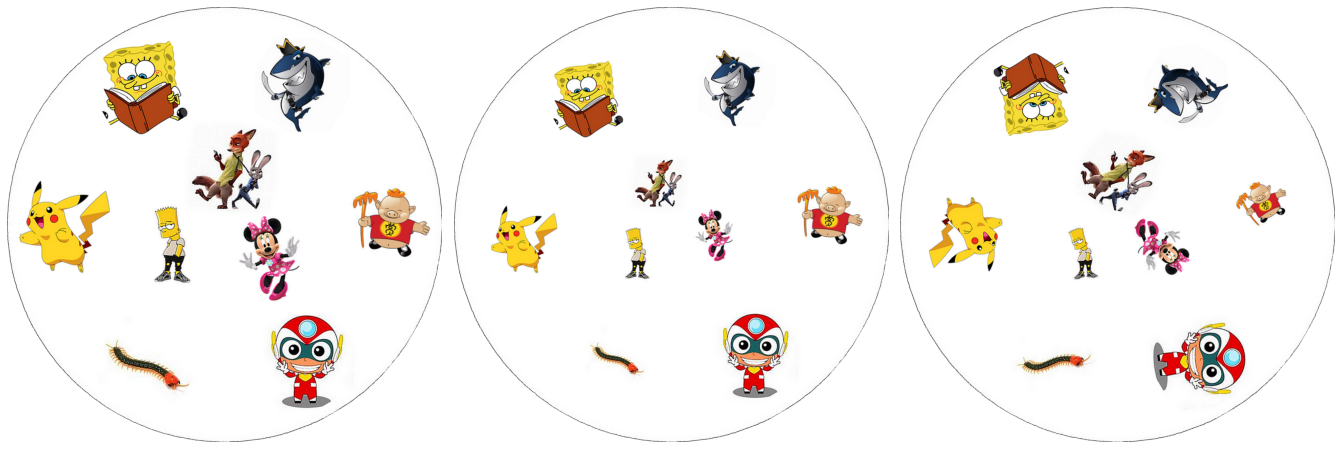

In [12]:
images9 = [images73[j] for j in cards_seqs[3]]
sample_file_0 = f'{dataset_root}/imgs/sample_test_0.png'
generate_card_ex(1024, 0.52, 0.12, images9, sample_file_0, force=True)
sample_file_1 = f'{dataset_root}/imgs/sample_test_1.png'
generate_card_ex(1024, 0.52, 0.12, images9, sample_file_1, resize_range=(0.52, 0.95), force=True)
sample_file_2 = f'{dataset_root}/imgs/sample_test_2.png'
generate_card_ex(1024, 0.52, 0.12, images9, sample_file_2, resize_range=(0.52, 0.95), rotate_range=(0, 360), force=True)

fig = plt.figure(figsize=(24, 8))
for i, img_file in enumerate([sample_file_0, sample_file_1, sample_file_2]):
    ax = fig.add_subplot(1, 3, i+1)
    plt.axis('off')
    img = cv2.imread(img_file, cv2.IMREAD_UNCHANGED)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGBA)
    plt.imshow(img);
plt.subplots_adjust(wspace =0, hspace =0)

#### Sift Features

In [13]:
# pickle

# Pickling cv2.KeyPoint causes PicklingError
# https://stackoverflow.com/questions/10045363/pickling-cv2-keypoint-causes-picklingerror

def generate_sift_features(images, outpath):
    import copyreg
    def _pickle_keypoints(point):
        return cv2.KeyPoint, (*point.pt, point.size, point.angle,
                              point.response, point.octave, point.class_id)
    copyreg.pickle(cv2.KeyPoint().__class__, _pickle_keypoints)
    feature_items = {}
    for imgpath in images:
        key = osp.basename(imgpath).split('.')[0]
        img = cv2.imread(imgpath)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        sift = cv2.xfeatures2d.SIFT_create()
        keypoints, descriptors = sift.detectAndCompute(gray, None)
        feature_items[key] = (keypoints, descriptors)
        
    with open(outpath, 'wb') as fw:
        pickle.dump(feature_items, fw)

outpath = f'{dataset_root}/keypoints_descriptors.sift'
generate_sift_features(images73, outpath)

with open(outpath, 'rb') as fr:
    feature_items_ = pickle.load(fr)

In [14]:
class CV2Image(object):
    def __init__(self):
        pass
    
    @staticmethod
    def open(img_path):
        return cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
    
    @staticmethod
    def resize(img, size):
        return cv2.resize(img, size)
    
    @staticmethod
    def rotate(img, angle, scale=1.0, center=None):
        (h, w) = img.shape[:2]
        if center is None:
            center = (w // 2, h // 2)
        M = cv2.getRotationMatrix2D(center, angle, scale)
        return cv2.warpAffine(img, M, (w, h))
        
    @staticmethod
    def gaussian_blur(img, ksize=(11, 11)):
        return cv2.GaussianBlur(img, ksize, 0)
    
    @staticmethod
    def median_blur(img, ksize=5):
        return cv2.medianBlur(img, ksize)
    
    @staticmethod
    def contrast(img, clip_limit=3.0, tile_grid_size=(8,8)):
        lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
        l, a, b = cv2.split(lab)
        clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
        cl = clahe.apply(l)
        limg = cv2.merge((cl,a,b))
        return cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
    
    @staticmethod
    def to_gray(img):
        return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    @staticmethod
    def to_rgb(img, alpha=True):
        if alpha:
            return cv2.cvtColor(img, cv2.COLOR_BGR2RGBA)
        return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    @staticmethod
    def to_thresh(img, threshold=190, reverse=False):                                
        if reverse:
            return cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY_INV)[1]
        return cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY)[1]
    
    @staticmethod
    def to_canny(img, thresh1=75, thresh2=200):
        return cv2.Canny(img, thresh1, thresh2)
    
    @staticmethod
    def show(img, figsize=(8, 8), gray=False, isbgr=True):
        plt.figure(figsize=figsize)
        plt.axis('off')
        if isbgr:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGBA)
        if gray:
            plt.imshow(img, cmap=plt.cm.gray)
        else:
            plt.imshow(img)

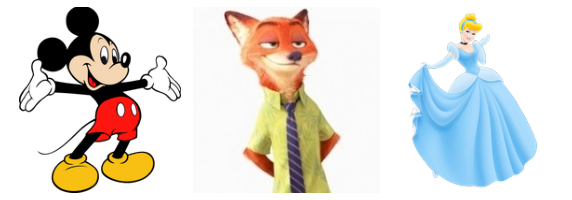

In [15]:
N = 3
def gen_sample_images(n=2):
    random.shuffle(images73)
    return [(osp.basename(f).split('.')[0], cv2.imread(f, cv2.IMREAD_UNCHANGED)) for f in images73[:n]]
samples = gen_sample_images(N)

nrow, ncol = int(N/3), 3
fig = plt.figure(figsize=(10*nrow, 5*ncol))
for i in range(nrow*ncol):
    ax = fig.add_subplot(nrow, ncol, i+1)
    plt.axis('off')
    plt.imshow(CV2Image.to_rgb(samples[i][1], alpha=True))
plt.subplots_adjust(wspace =0, hspace =0)

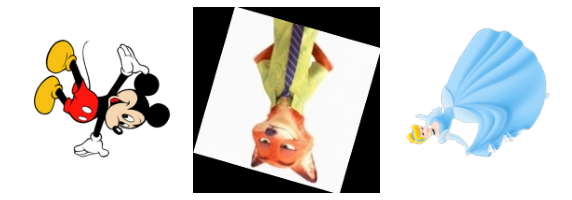

In [16]:
samples_changed = []
for title, img in samples:
    img_changed = CV2Image.rotate(img, random.randint(10, 350), scale=(0.6 + random.random()*0.4))
    samples_changed.append((title, img_changed))
    
nrow, ncol = int(N/3), 3
fig = plt.figure(figsize=(10*nrow, 5*ncol))
for i in range(nrow*ncol):
    ax = fig.add_subplot(nrow, ncol, i+1)
    plt.axis('off')
    plt.imshow(CV2Image.to_rgb(samples_changed[i][1], alpha=True))
plt.subplots_adjust(wspace =0, hspace =0)

In [17]:
def calculate_matches(matcher, des1, des2):
    matches = matcher.knnMatch(des1, des2, k=2)
    topResults1 = []
    for m,n in matches:
        if m.distance < 0.7*n.distance:
            topResults1.append([m])
            
    matches = matcher.knnMatch(des2, des1, k=2)
    topResults2 = []
    for m,n in matches:
        if m.distance < 0.7*n.distance:
            topResults2.append([m])
    
    topResults = []
    for match1 in topResults1:
        match1QueryIndex = match1[0].queryIdx
        match1TrainIndex = match1[0].trainIdx

        for match2 in topResults2:
            match2QueryIndex = match2[0].queryIdx
            match2TrainIndex = match2[0].trainIdx

            if (match1QueryIndex == match2TrainIndex) and (match1TrainIndex == match2QueryIndex):
                topResults.append(match1)
    return topResults


def sift_best_match(img, features):
    sift = cv2.xfeatures2d.SIFT_create()
    kp_1, desc_1 = sift.detectAndCompute(img, None)
    index_params = dict(algorithm=0, trees=5)
    search_params = dict()
    flann = cv2.FlannBasedMatcher(index_params, search_params)
    result = []
    for title, (keypoints, descriptors) in features.items():
        kp_2, desc_2 = keypoints, descriptors
        matches = calculate_matches(flann, desc_1, desc_2)
        score = 100 * (len(matches) / min(len(kp_1), len(kp_2)))
        result.append((score, title)) 
    return max(result, key=lambda x: x[0])

for title_org, img_org in samples_changed:
    result = sift_best_match(img_org, feature_items_)
    print(title_org, 'vs', result[1], 'score:', result[0])

27 vs 27 score: 49.122807017543856
49 vs 49 score: 57.25190839694656
3 vs 3 score: 52.17391304347826


### Contours

In [18]:
files = [osp.join(f'{dataset_root}/imgs', f) for f in os.listdir(f'{dataset_root}/imgs')]
img_org = cv2.imread(files[0], cv2.IMREAD_UNCHANGED) # IMREAD_UNCHANGED read Alpha

#### 原图

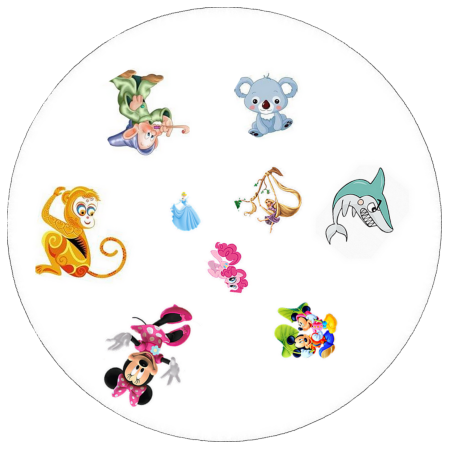

In [19]:
CV2Image.show(img_org, isbgr=True)

#### 增强对比度

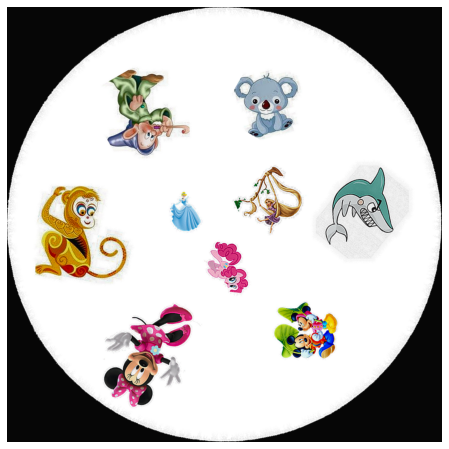

In [20]:
img_contrast = CV2Image.contrast(img_org)
CV2Image.show(img_contrast)

#### 修改大小

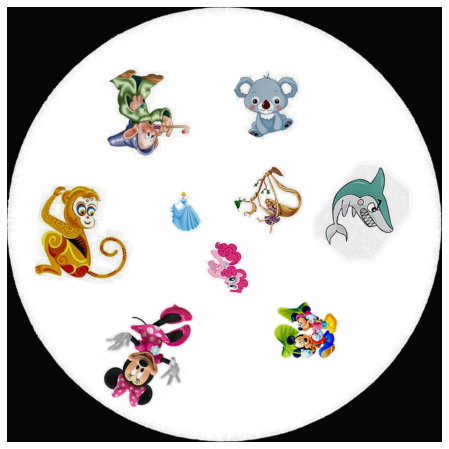

In [21]:
img_resize800 = CV2Image.resize(img_contrast, size=(800, 800))
CV2Image.show(img_resize800)

#### 高斯滤波

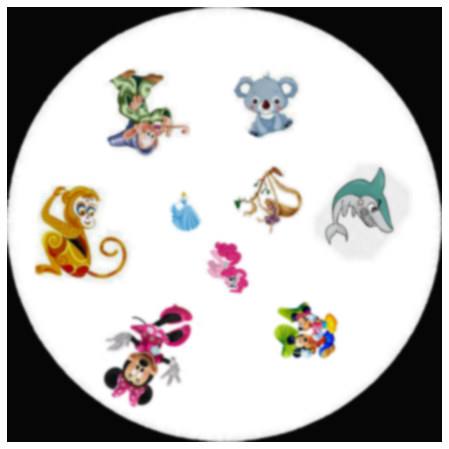

In [22]:
img_gaussian = CV2Image.gaussian_blur(img_resize800, ksize=(11, 11))
CV2Image.show(img_gaussian)

#### 中值滤波

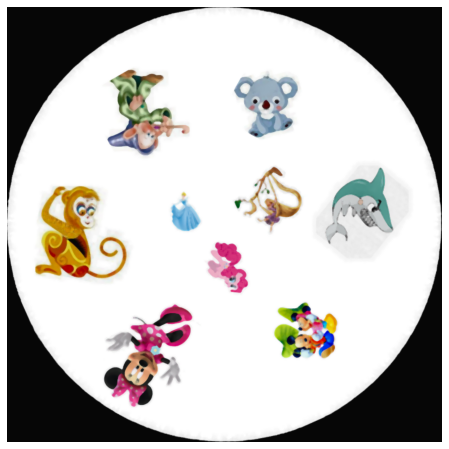

In [23]:
img_median = CV2Image.median_blur(img_resize800, ksize=5)
CV2Image.show(img_median)

#### 灰度

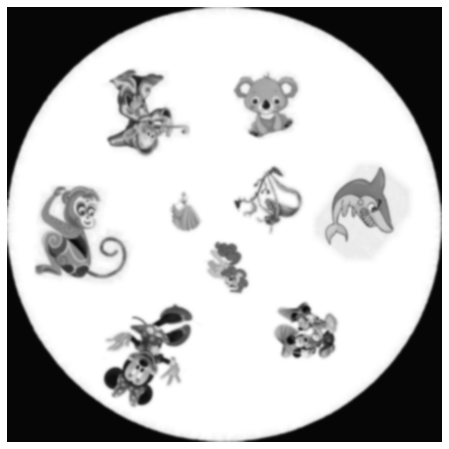

In [24]:
img_gray = CV2Image.to_gray(img_gaussian)
CV2Image.show(img_gray, gray=True)

#### 二值滤波

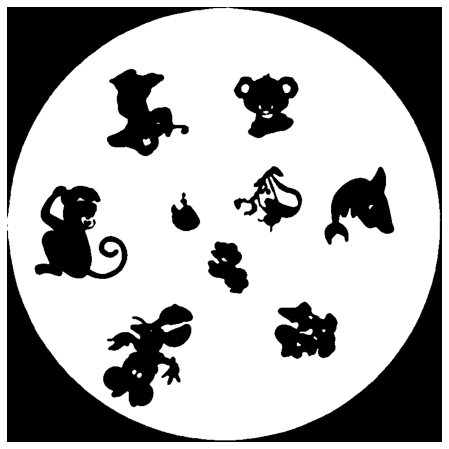

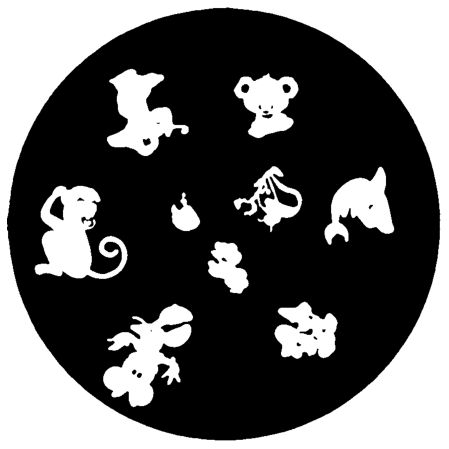

In [25]:
img_bin = CV2Image.to_thresh(img_gray, threshold=210)
CV2Image.show(img_bin, gray=True)

img_bin_inv = CV2Image.to_thresh(img_gray, threshold=210, reverse=True)
CV2Image.show(img_bin_inv, gray=True)

#### 边缘检测

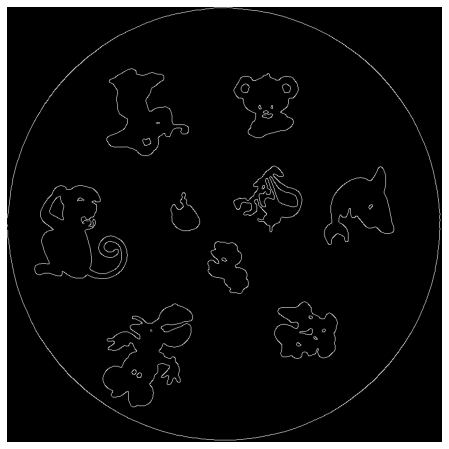

In [26]:
img_canny = CV2Image.to_canny(img_bin)
CV2Image.show(img_canny, gray=True)

#### 轮廓检测

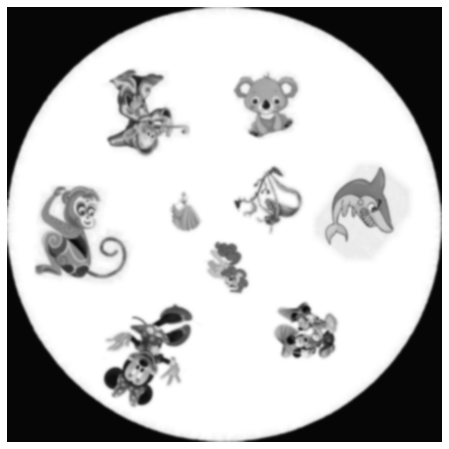

In [27]:
card_gray = CV2Image.to_gray(img_gaussian)
CV2Image.show(card_gray, gray=True)

In [28]:
card_thresh = cv2.threshold(card_gray, 210, 255, cv2.THRESH_BINARY)[1]
cnts, _ = cv2.findContours(card_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts_sorted = sorted(cnts, key=cv2.contourArea, reverse=True)

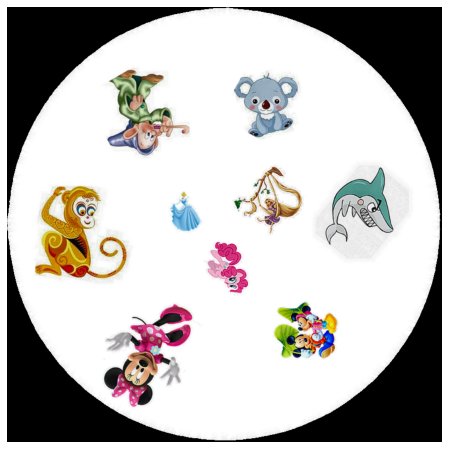

In [29]:
mask_black = np.zeros(card_gray.shape, np.uint8)
mask_bg_black_fg_white = cv2.drawContours(mask_black, cnts_sorted[:1], -1, (255, 255, 255), cv2.FILLED)
icons_fg_masked = cv2.bitwise_and(img_resize800, img_resize800, mask=mask_bg_black_fg_white)
CV2Image.show(icons_fg_masked)

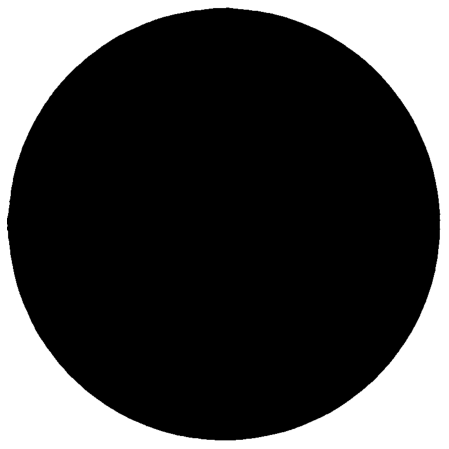

In [30]:
mask_bg_white_fg_black = cv2.bitwise_not(mask_bg_black_fg_white)
mask_white = np.full(img_gaussian.shape, 255, np.uint8)
card_bg_masked = cv2.bitwise_and(mask_white, mask_white, mask=mask_bg_white_fg_black)
CV2Image.show(card_bg_masked)

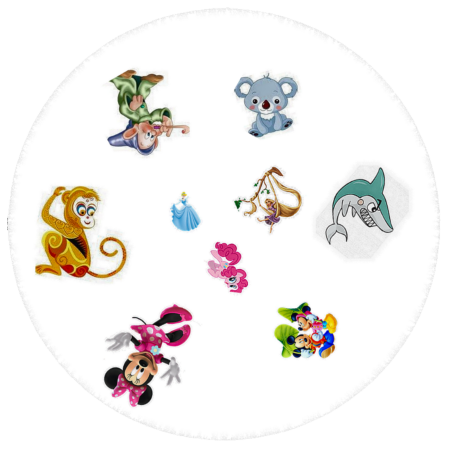

In [31]:
card_img = cv2.bitwise_or(icons_fg_masked, card_bg_masked)
CV2Image.show(card_img)

#### 封装工具类

In [32]:
class CV2Contour(object):
    def __init__(self):
        pass
    
    @staticmethod
    def make_white_background(img, contour):
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        mask_black = np.zeros(gray.shape, np.uint8)
        mask_bg_black_fg_white = cv2.drawContours(mask_black, [contour], -1, (255, 255, 255), cv2.FILLED)
        fg_masked = cv2.bitwise_and(img, img, mask=mask_bg_black_fg_white)
        
        mask_bg_white_fg_black = cv2.bitwise_not(mask_bg_black_fg_white)
        mask_white = np.full(img.shape, 255, np.uint8)
        bg_masked = cv2.bitwise_and(mask_white, mask_white, mask=mask_bg_white_fg_black)
        
        return cv2.bitwise_or(fg_masked, bg_masked)
    
    @staticmethod
    def make_out_roi(img, contour, square=False):
        x, y, w, h = cv2.boundingRect(contour)
        if square:
            if w < h:
                x += int((w-h)/2)
                w = h
            else:
                y += int((h-w)/2)
                h = w               
        return img[y:y+h, x:x+w], [x, y, w, h]
    
    @staticmethod
    def on_draw(img, contour, color=(255, 0, 0), thickness=2, rect=False):
        if rect:
            x, y, w, h = cv2.boundingRect(contour)
            out_image = cv2.rectangle(img.copy(), (x, y), (x+w, y+h), color=color, thickness=thickness)
        else:
            out_image = cv2.drawContours(img.copy(), [contour], -1, color=color, thickness=thickness)
        return out_image
    
    def grab_by_area(img, threshold=None, reverse=False, all=False, area=False):
        if threshold is not None:
            img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img_thresh = cv2.threshold(img_gray, threshold, 255, cv2.THRESH_BINARY)[1]
            if reverse: # cv2.THRESH_BINARY_INV
                img_thresh = cv2.bitwise_not(img_thresh) 
        else:
            img_thresh = img.copy()
        if all:
            cnts, _ = cv2.findContours(img_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        else: 
            # 最外围
            cnts, _ = cv2.findContours(img_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        if area:
            cnts = [c for c in cnts if cv2.contourArea(c) > area]
        return sorted(cnts, key=cv2.contourArea, reverse=True)

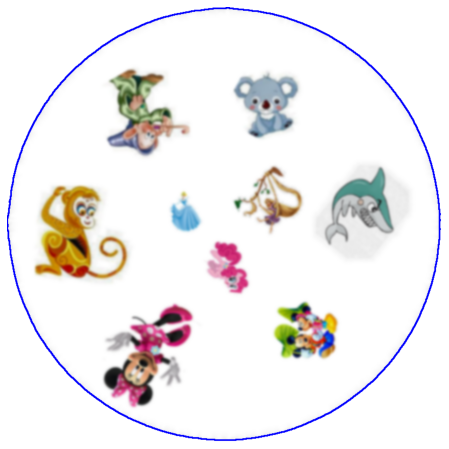

In [33]:
card_cnt = CV2Contour.grab_by_area(img_gaussian, threshold=210)[0]
card = CV2Contour.make_white_background(img_gaussian, card_cnt)
card_with_cnt = CV2Contour.on_draw(card, card_cnt)
CV2Image.show(card_with_cnt)

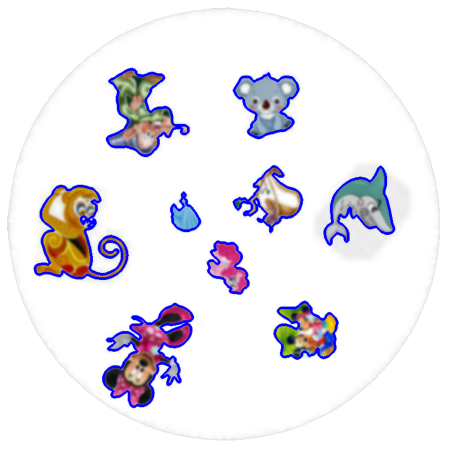

In [34]:
icon_cnts = CV2Contour.grab_by_area(card, threshold=210, reverse=True, area=700)
card_img = card.copy()
for cnt in icon_cnts[:9]:
    card_img = CV2Contour.on_draw(card_img, cnt, color=(255, 0, 0), thickness=3)
CV2Image.show(card_img)

[51, 329, 171, 171]


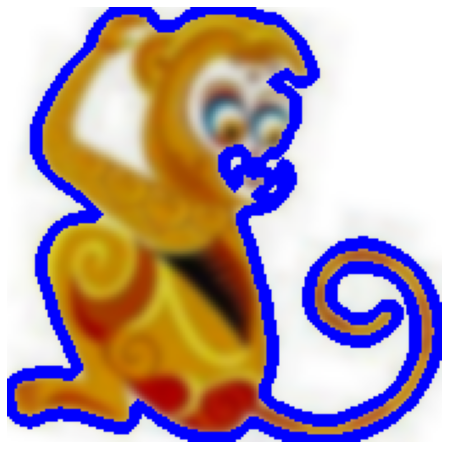

In [35]:
icon, rect = CV2Contour.make_out_roi(card_img, icon_cnts[0], square=True)
print(rect)
CV2Image.show(icon)

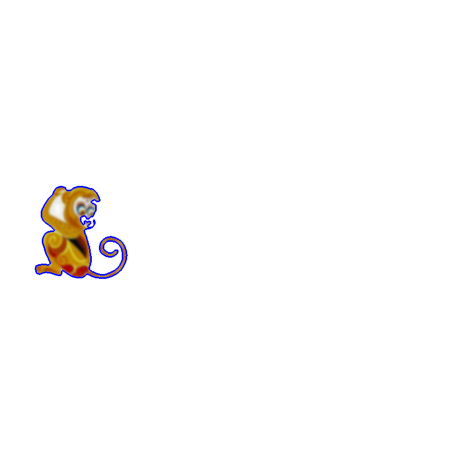

In [36]:
icon_bg_white = CV2Contour.make_white_background(card_img, icon_cnts[0])
CV2Image.show(icon_bg_white)

[51, 329, 171, 171]


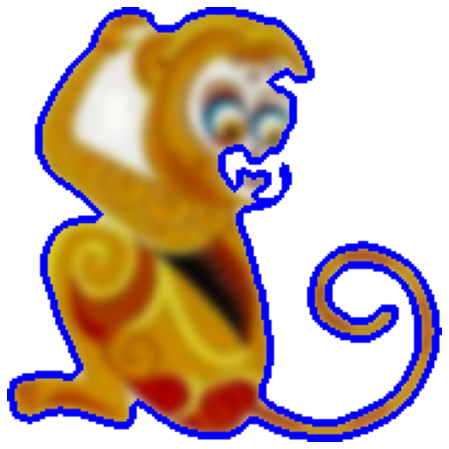

In [37]:
icon, rect = CV2Contour.make_out_roi(icon_bg_white, icon_cnts[0], square=True)
print(rect)
CV2Image.show(icon)

[(27.76, '30', [30, 311, 197, 191]),
 (32.41, '66', [464, 521, 167, 134]),
 (55.38, '63', [447, 86, 175, 149]),
 (45.14, '50', [205, 548, 168, 153]),
 (10.26, '37', [171, 133, 156, 138]),
 (12.99, '35', [568, 315, 155, 122]),
 (34.92, '70', [418, 309, 71, 73]),
 (8.93, '11', [287, 327, 70, 86]),
 (3.03, '35', [365, 433, 82, 75])]


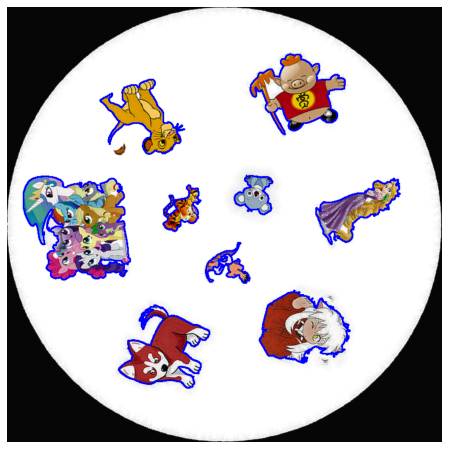

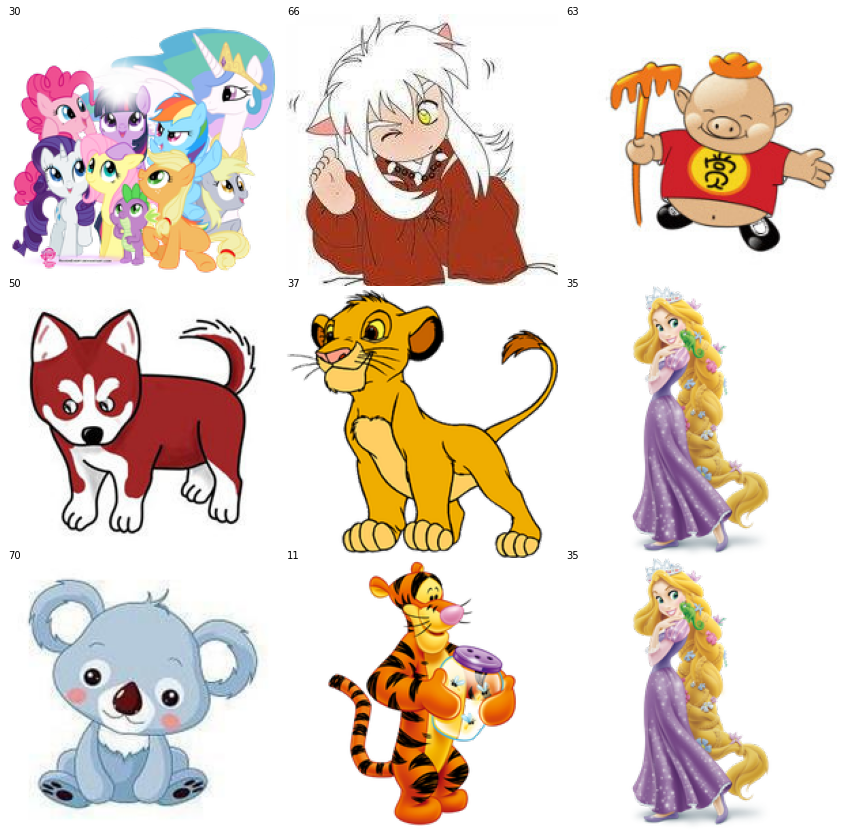

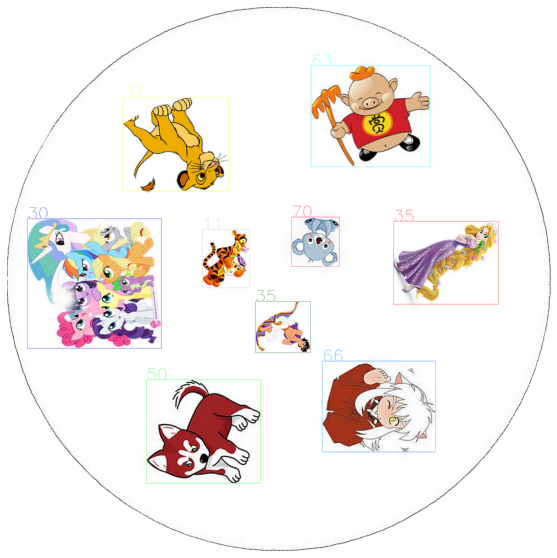

In [38]:
colors = [
    (255, 0, 0),     # 赤
    (255, 128, 0),   # 橙
    (255, 255, 0),   # 黄
    (0, 255, 0),     # 绿
    (0, 255, 255),   # 青
    (0, 0, 255),     # 蓝
    (128, 0, 255),   # 紫
    (190, 190, 190), # 灰
    (0, 100, 0),     # 深绿
]

def spotit_sift_detect(img_path, features_path, csize=800, threshold=220, max_num=9, debug=False):
    carea = round(csize * csize * 0.01 / max_num)
    
    sift = cv2.xfeatures2d.SIFT_create()
    index_params = dict(algorithm=0, trees=5)
    search_params = dict()
    flann = cv2.FlannBasedMatcher(index_params, search_params)
    with open(features_path, 'rb') as fr:
        features = pickle.load(fr)
        
    img = CV2Image.open(img_path)
    img = CV2Image.contrast(img)
    img = CV2Image.resize(img, size=(csize, csize))
    # img = CV2Image.median_blur(img, ksize=5)
    # img = CV2Image.gaussian_blur(img, ksize=(11, 11))
    if debug:
        img_t = img.copy()

    card_cnt = CV2Contour.grab_by_area(img, threshold=threshold)[0]
    card = CV2Contour.make_white_background(img, card_cnt)
    icon_cnts = CV2Contour.grab_by_area(card, threshold=threshold, reverse=True, area=carea)
    
    results = []
    for cnt in icon_cnts[:max_num]:
        if debug:
            img_t = CV2Contour.on_draw(img_t, cnt)
        icon = CV2Contour.make_white_background(card, cnt)
        icon, rect = CV2Contour.make_out_roi(icon, cnt, square=False)
        icon = CV2Image.to_gray(icon)
        kp_1, desc_1 = sift.detectAndCompute(icon, None)
        item = (0, -1, None)
        for img_id, (kp_2, desc_2) in features.items():
            matches = calculate_matches(flann, desc_1, desc_2)
            score = round(100 * (len(matches)/min(len(kp_1), len(kp_2))), 2)
            if score > item[0]:
                item = (score, img_id, rect)
        results.append(item)
    if debug:
        CV2Image.show(img_t)
    return results
    
test_image_path = outfiles[0]
test_features_file = f'{dataset_root}/keypoints_descriptors.sift'
csize = 800
results = spotit_sift_detect(
    test_image_path, test_features_file,
    csize=csize, threshold=220, max_num=9, debug=True)

pprint(results)

test_image = CV2Image.open(test_image_path)
img_w, img_h = test_image.shape[1], test_image.shape[0]
w_ratio, h_ratio = img_w / csize, img_h / csize
    
nrow, ncol = 3, 3
fig = plt.figure(figsize=(5*nrow, 5*ncol))
for i, (score, img_id, rect) in enumerate(results):
    x, y = int(rect[0] * w_ratio), int(rect[1] * h_ratio)
    w, h = int(rect[2] * w_ratio), int(rect[3] * h_ratio)
    cv2.rectangle(test_image, (x, y), (x+w, y+h), color=colors[i], thickness=1)
    cv2.putText(test_image, img_id, (x, y),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1.0,
                color=colors[i], thickness=1)
    icon_img = CV2Image.open(f'{dataset_root}/icons/{img_id}.png')
    ax = fig.add_subplot(nrow, ncol, i+1)
    plt.axis('off')
    plt.text(0, 0, img_id)
    plt.imshow(cv2.cvtColor(icon_img, cv2.COLOR_BGR2RGBA))
plt.subplots_adjust(wspace =0, hspace =0)

CV2Image.show(test_image, figsize=(10, 10))

## 前端对接


![](/files/assets/dobble/sample.jpeg)

### 步骤

####  从73组数字序列随机3组小图标(每组9个)

数字值对应的是图标id号, 由图标id号找到图标的下载地址(见步骤2的地址路径)

**这73组数字序列任意2组之间必然有一个图标是相同的(数字相同)**

```
[
    [0, 1, 2, 3, 4, 5, 6, 7, 8],
    [0, 9, 10, 11, 12, 13, 14, 15, 16],
    [0, 17, 18, 19, 20, 21, 22, 23, 24],
    [0, 25, 26, 27, 28, 29, 30, 31, 32],
    [0, 33, 34, 35, 36, 37, 38, 39, 40],
    [0, 41, 42, 43, 44, 45, 46, 47, 48],
    [0, 49, 50, 51, 52, 53, 54, 55, 56],
    [0, 57, 58, 59, 60, 61, 62, 63, 64],
    [0, 65, 66, 67, 68, 69, 70, 71, 72],
    [1, 9, 17, 25, 33, 41, 49, 57, 65],
    [1, 10, 18, 26, 34, 42, 50, 58, 66],
    [1, 11, 19, 27, 35, 43, 51, 59, 67],
    [1, 12, 20, 28, 36, 44, 52, 60, 68],
    [1, 13, 21, 29, 37, 45, 53, 61, 69],
    [1, 14, 22, 30, 38, 46, 54, 62, 70],
    [1, 15, 23, 31, 39, 47, 55, 63, 71],
    [1, 16, 24, 32, 40, 48, 56, 64, 72],
    [2, 9, 18, 27, 36, 45, 54, 63, 72],
    [2, 10, 17, 28, 35, 46, 53, 64, 71],
    [2, 11, 20, 25, 34, 47, 56, 61, 70],
    [2, 12, 19, 26, 33, 48, 55, 62, 69],
    [2, 13, 22, 31, 40, 41, 50, 59, 68],
    [2, 14, 21, 32, 39, 42, 49, 60, 67],
    [2, 15, 24, 29, 38, 43, 52, 57, 66],
    [2, 16, 23, 30, 37, 44, 51, 58, 65],
    [3, 9, 19, 29, 39, 46, 56, 58, 68],
    [3, 10, 20, 30, 40, 45, 55, 57, 67],
    [3, 11, 17, 31, 37, 48, 54, 60, 66],
    [3, 12, 18, 32, 38, 47, 53, 59, 65],
    [3, 13, 23, 25, 35, 42, 52, 62, 72],
    [3, 14, 24, 26, 36, 41, 51, 61, 71],
    [3, 15, 21, 27, 33, 44, 50, 64, 70],
    [3, 16, 22, 28, 34, 43, 49, 63, 69],
    [4, 9, 20, 31, 38, 42, 51, 64, 69],
    [4, 10, 19, 32, 37, 41, 52, 63, 70],
    [4, 11, 18, 29, 40, 44, 49, 62, 71],
    [4, 12, 17, 30, 39, 43, 50, 61, 72],
    [4, 13, 24, 27, 34, 46, 55, 60, 65],
    [4, 14, 23, 28, 33, 45, 56, 59, 66],
    [4, 15, 22, 25, 36, 48, 53, 58, 67],
    [4, 16, 21, 26, 35, 47, 54, 57, 68],
    [5, 9, 21, 30, 34, 48, 52, 59, 71],
    [5, 10, 22, 29, 33, 47, 51, 60, 72],
    [5, 11, 23, 32, 36, 46, 50, 57, 69],
    [5, 12, 24, 31, 35, 45, 49, 58, 70],
    [5, 13, 17, 26, 38, 44, 56, 63, 67],
    [5, 14, 18, 25, 37, 43, 55, 64, 68],
    [5, 15, 19, 28, 40, 42, 54, 61, 65],
    [5, 16, 20, 27, 39, 41, 53, 62, 66],
    [6, 9, 22, 32, 35, 44, 55, 61, 66],
    [6, 10, 21, 31, 36, 43, 56, 62, 65],
    [6, 11, 24, 30, 33, 42, 53, 63, 68],
    [6, 12, 23, 29, 34, 41, 54, 64, 67],
    [6, 13, 18, 28, 39, 48, 51, 57, 70],
    [6, 14, 17, 27, 40, 47, 52, 58, 69],
    [6, 15, 20, 26, 37, 46, 49, 59, 72],
    [6, 16, 19, 25, 38, 45, 50, 60, 71],
    [7, 9, 23, 26, 40, 43, 53, 60, 70],
    [7, 10, 24, 25, 39, 44, 54, 59, 69],
    [7, 11, 21, 28, 38, 41, 55, 58, 72],
    [7, 12, 22, 27, 37, 42, 56, 57, 71],
    [7, 13, 19, 30, 36, 47, 49, 64, 66],
    [7, 14, 20, 29, 35, 48, 50, 63, 65],
    [7, 15, 17, 32, 34, 45, 51, 62, 68],
    [7, 16, 18, 31, 33, 46, 52, 61, 67],
    [8, 9, 24, 28, 37, 47, 50, 62, 67],
    [8, 10, 23, 27, 38, 48, 49, 61, 68],
    [8, 11, 22, 26, 39, 45, 52, 64, 65],
    [8, 12, 21, 25, 40, 46, 51, 63, 66],
    [8, 13, 20, 32, 33, 43, 54, 58, 71],
    [8, 14, 19, 31, 34, 44, 53, 57, 72],
    [8, 15, 18, 30, 35, 41, 56, 60, 69],
    [8, 16, 17, 29, 36, 42, 55, 59, 70]
]

```

####  拼接地址,下载图标

从`https://raceai.s3.didiyunapi.com/data/datasets/cv/dobble/icons.json`获取小图标信息

```json
[
  {
    "image_path": "icons/71.png",  // 图标相对位置(绝对地址: https://raceai.s3.didiyunapi.com/data/datasets/cv/dobble/icons/71.png)
    "label": 71                    // 图标的id号, 对应的是73个数字序列
  },
  {
    "image_path": "icons/64.png",
    "label": 64
  },
  ...
]
```

#### 随机出的每组图标, 合成一张大卡片(9个元素)

需要前端用算法设计出合并大卡片, 其中要求: 内环3个, 外环6个, 每个图标可以根据游戏的难易程度进行大小,旋转设置

每个小图标原始大小为`200x200`, 9个图标合成大卡片后传给后端大小为`1024x1024`

|难易程度|合成算法|其他描述
|:---:|:----|:---
|<img width=200/>|<img width=400/>|<img width=300/>
|简单|对每个卡片中的9个小图标, 大小不变, 同时不做旋转 |
|中等|对每个卡片中的9个小图标, 大小做随机缩放, 但不做旋转 | 缩放比为(0.8, 1.0)之间 (可以不限制, 已布局合理为重点)
|困难|对每个卡片中的9个小图标, 大小做随机缩放, 同时做随机旋转 | 缩放比为(0.8, 1.0)之间(可以不限制, 已布局合理为重点), 旋转角度为(0, 360)度之间

![](/files/assets/dobble/dobble_levels.png)


#### 游戏规则(3个卡片, 中间卡片为共有卡片)

简单实例:

卡片标记|图标序列|其他描述
:---:|:----:|:----
<img width=200/>|<img width=400\>|<img width=200\>
$C_0$|`[1,2,3,4,5,6,7,8,9]`|中间公共
$C_1$|`[1,11,12,13,14,15,16,17,18]`|左侧用户玩家
$C_2$|`[2,21,22,23,24,25,26,27,28]`|右侧AI玩家

3个卡片包含的小图标序列是已知的, AI同时根据传入的卡片$C_2$进行识别图标操作, 最终返回AI结果序列(即$\hat{C_2}$), 不一定和真实$C_2$序列相同

1. 用户玩家从$C_0$和$C_1$找相同

2. AI玩家从$C_0$和$C_2$找相同 (AI的返回序列$\hat{C_2}$参见接口描述)

   $2 = C_0 \cap C_2$
   
   衡量结果: $C_0 \cap C_2 == C_0 \cap \hat{C_2}$

3. 规定时间内, 谁先找到谁赢, 否则平局


![](/files/assets/dobble/sample2.jpeg)

### 接口

假设b4data为$C_2$卡片图片的base64

In [39]:
with open(test_image_path, 'rb') as fr:
    b4data = base64.b64encode(fr.read()).decode()

#### REST API

POST: http://116.85.5.40:9119/raceai/framework/inference

输入:

```json
{
    "task": "det.features",
    "cfg": {
        "trainer": {
            "class_name": "raceai.utils.spotit.spotit_detect",
            "params": {
                "feat_path": "/raceai/data/ckpts/dobble/keypoints_descriptors.bin",
                "threshold": 220,
                "max_num": 9
            }
        },
        "data": {
            "class_name": "raceai.data.process.Base64DataLoader",  
            "params": {
                "data_source": b4data,  // 只需要修改传入的卡片base64
                "dataset": {
                    "class_name": "raceai.data.PredictSingleImageRaw",
                    "params": {}
                }
            }
        },
        "model": {
            "class_name": f"raceai.models.xfeatures.Features2dSift",  
            "params": {
                "matcher": {
                    "class_name": "raceai.models.xfeatures.FlannMatcher",
                    "params": {
                        "index_params": {"algorithm": 0, "trees": 5},
                        "search_params": {"checks": 32}
                    }
                }
            }
        }
    }
}
```

输出:

```json
{'errno': 0,
 'result': {'b4img_1609148709': {'10': {'rect': [339, 431, 107, 97],
                                        'score': 11.63},
                                 '24': {'rect': [463, 85, 121, 185],
                                        'score': 9.9},
                                 '33': {'rect': [485, 510, 139, 143],
                                        'score': 4.0},
                                 '41': {'rect': [192, 549, 171, 154],
                                        'score': 48.67},
                                 '48': {'rect': [568, 291, 146, 151],
                                        'score': 30.0},
                                 '5': {'rect': [46, 319, 164, 190],
                                       'score': 18.25},
                                 '52': {'rect': [292, 322, 78, 74],
                                        'score': 35.0},
                                 '64': {'rect': [428, 321, 103, 103],
                                        'score': 42.72},
                                 '72': {'rect': [201, 150, 87, 126],
                                        'score': 19.23}}}}
```

b4img_1609148709: 图片临时名字(不重要)

数字序列$\hat{C_2}$ = [10,24,33,41,48,5,52,64,72]

rect: 表示识别图标的坐标位置 (可忽略)
score: 识别图标的分数(可忽略)

### 调用样例

In [40]:
API_INFERENCE = f'{RACEURL}/raceai/framework/inference'

reqdata = '''{
    "task": "det.features",
    "cfg": {
        "trainer": {
            "class_name": "raceai.utils.spotit.spotit_detect",
            "params": {
                "feat_path": "/raceai/data/ckpts/dobble/keypoints_descriptors.bin",
                "threshold": 220,
                "max_num": 9
            }
        },
        "data": {
            "class_name": "raceai.data.process.Base64DataLoader",  
            "params": {
                "data_source": b4data,
                "dataset": {
                    "class_name": "raceai.data.PredictSingleImageRaw",
                    "params": {}
                }
            }
        },
        "model": {
            "class_name": f"raceai.models.xfeatures.Features2dSift",  
            "params": {
                "matcher": {
                    "class_name": "raceai.models.xfeatures.FlannMatcher",
                    "params": {
                        "index_params": {"algorithm": 0, "trees": 5},
                        "search_params": {"checks": 32}
                    }
                }
            }
        }
    }
}'''

cfg = eval(reqdata)
print('-------------输入--------------')
print(reqdata)
resdata = json.loads(requests.post(url=API_INFERENCE, json=cfg).text)
print('-------------输出--------------')
pprint(resdata)

-------------输入--------------
{
    "task": "det.features",
    "cfg": {
        "trainer": {
            "class_name": "raceai.utils.spotit.spotit_detect",
            "params": {
                "feat_path": "/raceai/data/ckpts/dobble/keypoints_descriptors.bin",
                "threshold": 220,
                "max_num": 9
            }
        },
        "data": {
            "class_name": "raceai.data.process.Base64DataLoader",  
            "params": {
                "data_source": b4data,
                "dataset": {
                    "class_name": "raceai.data.PredictSingleImageRaw",
                    "params": {}
                }
            }
        },
        "model": {
            "class_name": f"raceai.models.xfeatures.Features2dSift",  
            "params": {
                "matcher": {
                    "class_name": "raceai.models.xfeatures.FlannMatcher",
                    "params": {
                        "index_params": {"algorithm": 0, "trees": 5},
   